# Simple LLM langGraph workflow

In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI


In [2]:
# load all the env vars (OPENAI API KEY)
load_dotenv()

True

In [ ]:
# Using open ai chat model as an llm (Any llm can be chosen)
model = ChatOpenAI(model="gpt-5-nano")

In [ ]:
# Define workflow state
class QaState(TypedDict):
    question: str
    answer: str


In [9]:
def qa(state: QaState) -> QaState:
    question = state["question"]
    response = model.invoke( f"Answer this question {question}")
    state["answer"] = response.content
    return state

In [ ]:
# Define Graph

graph = StateGraph(QaState)

# add nodes
graph.add_node('qa', qa)

# add edges
graph.add_edge(START, 'qa')
graph.add_edge('qa', END)

workflow = graph.compile()


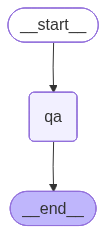

In [14]:
# Visualize the created workflow

from IPython.display import Image, display

# Standard Mermaid rendering
display(Image(workflow.get_graph().draw_mermaid_png()))

In [ ]:
input_state = {
    "question": "What is the capital of France?"
}

# Invoke workflow and obtain final state or output of workflow
final_state = workflow.invoke(input_state)
print(final_state)

{'question': 'What is the capital of France?', 'answer': 'Paris.'}
